In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/haris/Downloads/assignment ds/logistic regression/bank-full.csv", delimiter=';')
data.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
print(data.age.shape)


(45211,)


In [4]:
# convert categorical data using LabelEncoder :
le = LabelEncoder()
data["job"] = le.fit_transform(data["job"])
data["marital"] = le.fit_transform(data["marital"])
data["education"] = le.fit_transform(data["education"])
data["default"] = le.fit_transform(data["default"])
data["housing"] = le.fit_transform(data["housing"])
data["loan"] = le.fit_transform(data["loan"])
data["contact"] = le.fit_transform(data["contact"])
data["month"] = le.fit_transform(data["month"])
data["poutcome"] = le.fit_transform(data["poutcome"])
data["y"] = le.fit_transform(data["y"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [6]:
# split dataset into label and features :
y_label = data.iloc[:,16]
x_features = data.iloc[:,0:16]
y_label.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [7]:
# to check for null value :
print(data.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


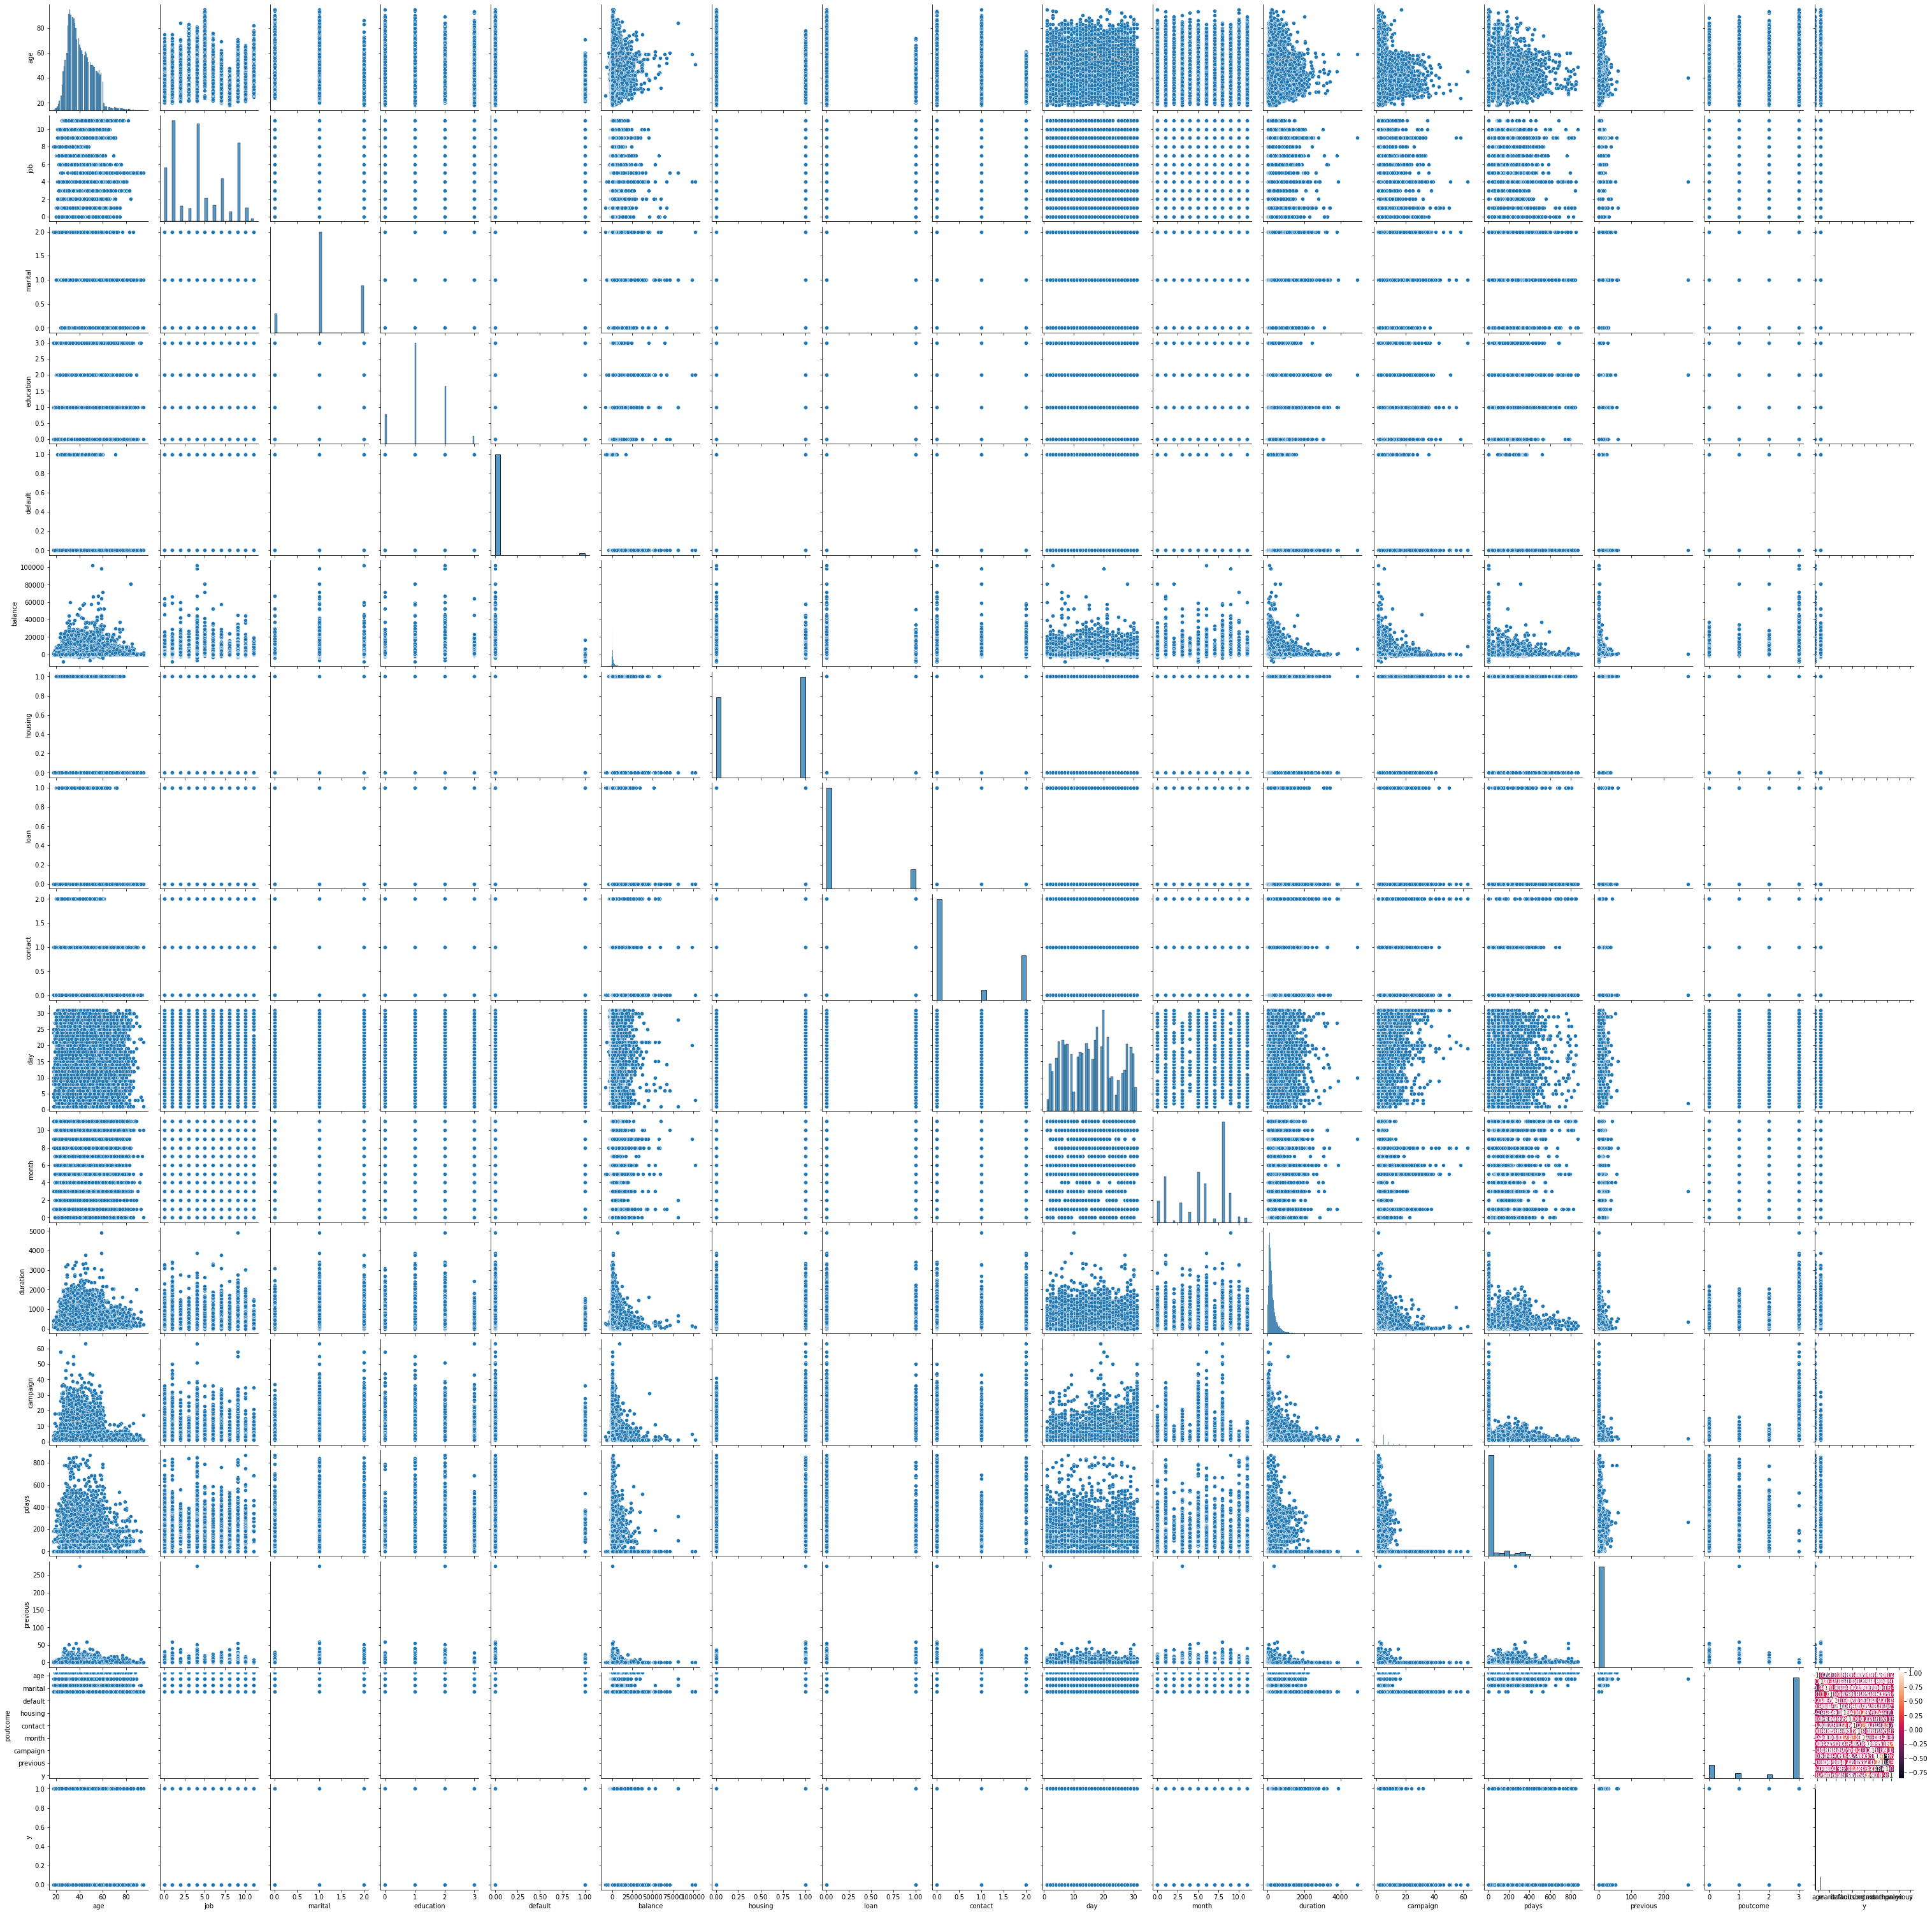

In [8]:
# plot pairplot and heatmap :
sns.pairplot(data)
sns.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
# split data for training and testing and preapare model :
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, train_size=0.8, random_state=1)
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
y_pred = model.predict(x_features)
y_pred_prob = model.predict_proba(x_features)
y_pred_prob.shape

C:\Users\haris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(45211, 2)

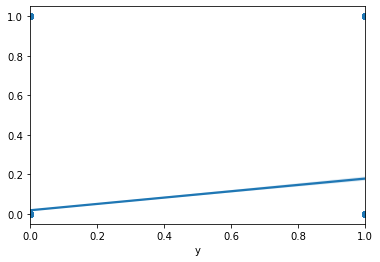

In [10]:
sns.regplot(x=y_label, y=y_pred)
plt.show()

In [11]:
# for confusion metrix and accuracy_score :
y_df = pd.DataFrame({"actual":y_label, "prediction":y_pred})
y_df.head(50)

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [12]:
print(pd.crosstab(y_df.actual, y_df.prediction))

prediction      0    1
actual                
0           39185  737
1            4344  945


In [13]:
cm = confusion_matrix(y_df.actual, y_df.prediction)
print(cm)

[[39185   737]
 [ 4344   945]]


In [14]:
accuracy = accuracy_score(y_df.actual, y_df.prediction)
print(accuracy)  

0.8876158457012674


In [15]:
# predict for new_data :
new_data = pd.DataFrame({"age":33 , "job":4 , "marital":1 , "education":3 , "default":0,"balance":231, "housing":1, "loan":1,"contact":2, "day":19,"month":6, "duration":1246, "campaign":15, "pdays":102 , "previous":12 , "poutcome":2}, index=[0])
model.predict(new_data)

array([0])

In [16]:
# ruc_curve and classification_report :
fpr, tpr, threshold = roc_curve(y_label, model.predict_proba(x_features)[:,1])

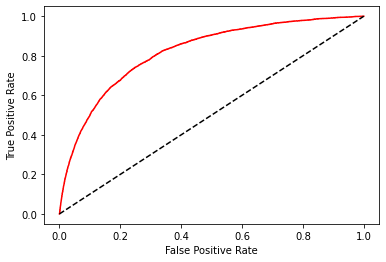

In [17]:
df_new = pd.DataFrame({"fpr":fpr, "tpr":tpr, "cutoff":threshold})
plt.plot(fpr, tpr, color="red")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],'k--')
plt.show()

In [18]:
auc = roc_auc_score(y_df.actual, y_df.prediction)
auc                                           

0.5801058590058896

In [19]:
print(classification_report(y_df.actual, y_df.prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [20]:
# for better cutoff :
prob = y_pred_prob[:,1]
update_df = pd.DataFrame({"actual":y_label, "pred":0})
update_df.loc[prob>0.235, "pred"]=1
update_df.head(25)

,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [21]:
new_auc = roc_auc_score(update_df.actual, update_df.pred)
print(new_auc) 

0.6875013977198816


In [22]:
print(classification_report(update_df.actual, update_df.pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     39922
           1       0.41      0.46      0.44      5289

    accuracy                           0.86     45211
   macro avg       0.67      0.69      0.68     45211
weighted avg       0.87      0.86      0.86     45211



In [23]:
# dataframe of coefficient for our convenience :
print(model.coef_)

[[-2.43027915e-02  1.81308837e-02 -1.12083483e-01 -1.77276479e-02
  -6.60363883e-03  3.40701934e-05 -2.20337674e-01 -6.33260908e-02
  -2.22698554e-01 -1.85475449e-02 -6.44371723e-02  3.54338914e-03
  -3.16437308e-01 -1.11664220e-03  1.35601413e-01 -2.21367720e-01]]


In [24]:
print(model.intercept_)

[-0.08489321]


In [25]:
intercept = model.intercept_
coefs = model.coef_
print(coefs.shape)

(1, 16)


In [26]:
coef_df = pd.DataFrame(np.transpose(coefs), x_features.columns, columns=["coefficient"])
print(coef_df)

           coefficient
age          -0.024303
job           0.018131
marital      -0.112083
education    -0.017728
default      -0.006604
balance       0.000034
housing      -0.220338
loan         -0.063326
contact      -0.222699
day          -0.018548
month        -0.064437
duration      0.003543
campaign     -0.316437
pdays        -0.001117
previous      0.135601
poutcome     -0.221368


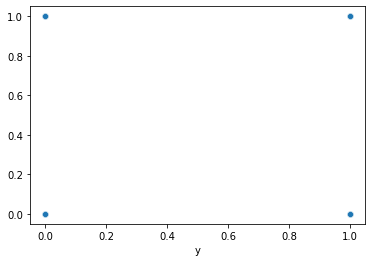

In [27]:
sns.scatterplot(x=y_label, y=y_pred)
#sns.scatterplot(x=y_label, y=x_features)
plt.show()

In [28]:
# to practice on visulization we take only two features :
data_2 = pd.DataFrame(data["balance"])
data_2.columns = ["balance"]
data_2["duration"] = np.sort(data["duration"])
data_2["y"] = data["y"]
data_2["balance"] = np.sort(data_2["balance"])
data_2.tail(20)

,balance,duration,y
45191,45248,2653,1
45192,45789,2692,1
45193,51439,2769,1
45194,52499,2770,0
45195,52527,2775,1
45196,52587,2870,1
45197,52587,3025,1
45198,56831,3076,0
45199,57435,3078,0
45200,58544,3094,1


In [29]:
admited = data_2[data_2["y"] == 1]
not_admited = data_2[data_2["y"] == 0]
print(admited.head())

     balance  duration  y
83     -1224         6  1
86     -1212         6  1
87     -1206         6  1
129    -1038         7  1
168     -961         7  1


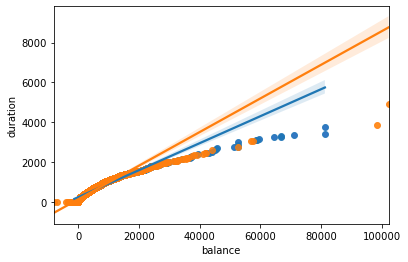

In [30]:
# plotting of features at 1 and 0 :
sns.scatterplot(x=admited.balance, y=admited.duration, color="blue", alpha=0.5)
sns.scatterplot(x=not_admited.balance, y=not_admited.duration, color="orange", alpha=0.5)
sns.regplot(x=admited.balance, y=admited.duration)
sns.regplot(x=not_admited.balance, y=not_admited.duration)
plt.show()

In [31]:
# split new data to preapare model :
x_new = data_2.iloc[:, 0:2]
y_new = data_2.iloc[:,2]
print(y_new.head())

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


In [32]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new)
new_model = LogisticRegression()
new_model.fit(x_new_train, y_new_train)
new_pred = new_model.predict(x_new_test)
new_accuracy = accuracy_score(y_new_test, new_pred)
print(new_accuracy)                             

0.8854286472617889


In [33]:
new_intercept = new_model.intercept_
new_coefs = new_model.coef_
new_coefs_df = pd.DataFrame(np.transpose(new_coefs), x_new.columns, columns=["coefficients"])
print(new_coefs_df)

          coefficients
balance      -0.000377
duration      0.007446


In [34]:
# for equation line :
y_eq = new_intercept + x_new.balance*new_coefs_df.coefficients[0] + x_new.duration*new_coefs_df.coefficients[1]

y_value = (-1/new_coefs_df.coefficients[1])*(new_intercept + x_new.balance*new_coefs_df.coefficients[0])
x_value = np.array(np.linspace(min(x_new.balance)-2, max(x_new.duration)+2, len(y_value)))
#print(x_value.shape)
print(y_value.shape)

(45211,)


C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


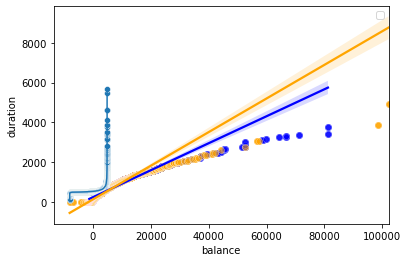

0          97.967586
1         157.272040
2         298.449024
3         333.110756
4         336.096219
            ...     
45206    4105.926497
45207    4612.746809
45208    4612.746809
45209    5483.743018
45210    5671.472986
Name: balance, Length: 45211, dtype: float64
[-8021.         -8020.71375802 -8020.42751604 ...  4919.42751604
  4919.71375802  4920.        ]


In [35]:
sns.regplot(x=admited.balance, y=admited.duration, color="blue")
sns.regplot(x=not_admited.balance, y=not_admited.duration, color="orange")
sns.scatterplot(x=admited.balance, y=admited.duration, color="blue", alpha=0.5)
sns.scatterplot(x=not_admited.balance, y=not_admited.duration, color="orange", alpha=0.5)
sns.lineplot(x=x_value, y=y_value)
sns.scatterplot(x_value, y_value)
plt.legend()
plt.show()
print(y_value)
print(x_value)

In [36]:
print(x_value)

[-8021.         -8020.71375802 -8020.42751604 ...  4919.42751604
  4919.71375802  4920.        ]


In [37]:
print(y_value)

0          97.967586
1         157.272040
2         298.449024
3         333.110756
4         336.096219
            ...     
45206    4105.926497
45207    4612.746809
45208    4612.746809
45209    5483.743018
45210    5671.472986
Name: balance, Length: 45211, dtype: float64
